# D212 - Data Mining II - Performance Assessment Task 2
## Joshua T. Funderburk

#### Programming Environment

In [1]:
from platform import python_version
print(f"Python version: {python_version()}")

Python version: 3.12.8


# Part I: Research Question

## A1: Proposal of Question

The question proposed for this analysis is "What are the key underlying factors that contribute to the variation in patient care metrics that could help identify patterns related to hospital readmission risk?" Hospital readmittance has a costly impact on hospitals, medical staff, insurance companies, and patients. Hospital and medical staff availability is generally spread thin with the amount of patients admitted. Insurance companies and patients often suffer substantial financial burden from repeat stays. Most importantly, patients who are readmitted often do not have as great of a patient outcome. Readmittance can also indicate gaps in the quality of care or post-discharge support. By uncovering patterns related to hospital readmittance, analysis and recommendations can be provided to medical staff to educate care givers and get ahead of issues relating to readmittance.

## A2: Defined Goal

The goal of this analysis is to identify underlying patterns in the medical data set that explain the most variation in order to understand which combinations of factors are most strongly associated with hospital readmission. Using Principal Component Analysis (PCA) in Python, patient demographic and health condition data will be used to find patterns that explain variation. Once patterns in variation are found, these patterns will be broken out by patients who were readmitted and those who were not readmitted to find which patterns are most closely associated to those that were readmitted. These insights will be used to develop recommendations for medical staff to support their decision-making process for patient care and discharge planning.

# Part II: Method Justification

## B1: Explanation of PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique that can be used to visualize complex data by finding the most important patterns in the data. Essentially, PCA extracts information from a high-dimensional space by projecting it into a lower-dimensional sub-space (Sharma, 2024). Powell suggests that PCA is like finding a good camera angle - the photographer finds a good angle on a three dimensional object in order to best display it in a two dimensional photograph. Principal Components are new variables created by PCA that are linear combinations of the original variables, created by finding the directions in the data that contain the most variation (What is Principal Component Analysis (PCA)? 2023). Each Principal Component is a weighted combination of the original variables, but are constructed to be uncorrelated with all other components.

For this data set, prior to performing PCA, the variables identified for analysis are standardized which can be accomplished using sci-kit learn's StandardScaler. This ensures that variables with larger scales, such as income, do not dominate variables with smaller scales, such as with the survey scores. Following standardization, PCA will identify the combination of variables that explain the most variance. The first component will identify the combination that explains the variance the most. The second component will explain the next amount of variance and so on until the number of Principal Components equals the initial number of feature variables. This can be accomplished using PCA from sci-kit learn's decomposition package.

The primary expected outcome is to be able to reduce the number of dimensions from 19 into a smaller set of meaningful components while preserving most of the important information. The result should also allow for the discovery of underlying patterns that may not be visible when analyzing the variables individually. Finally, the principal components should be able to be tied back to the readmission column from the medical data data frame and then split between patients who were readmitted to see if any Principal Component explains the variance between readmittance. This analysis will help identify which combinations of patient care metrics and demographic factors are most strongly associated with readmission risk.

## B2: PCA Assumption

A key assumption of PCA is that relationships between variables in the data are linear (Keita, 2023). To state this another way, PCA assumes patterns or correlations in the data can be captured by linear combinations of the original variables. PCA may not effectively capture the true structure of the data if the relationships between variables are non-linear. 

# Part III: Data Preparation

#### Data preparation steps required prior analysis; section C1 begins after the steps are complete.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Read CSV & Load Data in to Pandas Dataframe
df = pd.read_csv(r'C:\Users\funde\Desktop\WGU\D212\medical_clean.csv',index_col=0)

In [4]:
# Print top 5 rows of the Dataframe
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
# Identify columns that do not contain values for all 10000 rows in the data set
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [6]:
# Reverse the scale for survey responses so that a higher score indicates higher importance and a lower score indicates lower importance
for col in df.columns:
    if col.startswith('Item'):
        df[col] = 9 - df[col]

# Rename survey columns to better match the data definition
df.rename(columns={'Item1':'Item1-Survey_Timely_Admission',
                     'Item2':'Item2-Survey_Timely_Treatment',
                     'Item3':'Item3-Survey_Timely_Visit',
                     'Item4':'Item4-Survey_Reliability',
                     'Item5':'Item5-Survey_Options',
                     'Item6':'Item6-Hours_of_Treatment',
                     'Item7':'Item7-Survey_Courteous_Staff',
                     'Item8':'Item8-Survey_Doctor_Active_Listening',
                    },
            inplace=True
            )

# Confirm column names have been updated
print(df.columns[-8:])

Index(['Item1-Survey_Timely_Admission', 'Item2-Survey_Timely_Treatment',
       'Item3-Survey_Timely_Visit', 'Item4-Survey_Reliability',
       'Item5-Survey_Options', 'Item6-Hours_of_Treatment',
       'Item7-Survey_Courteous_Staff', 'Item8-Survey_Doctor_Active_Listening'],
      dtype='object')


## C1: Continuous Data Set Variables

The continuous data set variables selected for this analysis are:
- Additional_charges
- Age
- Children
- Doc_visits
- Full_meals_eaten
- Income
- Initial_days
- Item1-Survey_Timely_Admission
- Item2-Survey_Timely_Treatment
- Item3-Survey_Timely_Visit
- Item4-Survey_Reliability
- Item5-Survey_Options
- Item6-Hours_of_Treatment
- Item7-Survey_Courteous_Staff
- Item8-Survey_Doctor_Active_Listening
- Population
- TotalCharge
- VitD_levels
- vitD_supp

A dataframe is created that consists only of the continuous variables identified.

In [7]:
# Select the continuous variables for PCA
cont_list = ['Additional_charges',
             'Age', 
             'Children',
             'Doc_visits',
             'Full_meals_eaten',
             'Income',
             'Initial_days',
             'Item1-Survey_Timely_Admission',
             'Item2-Survey_Timely_Treatment',
             'Item3-Survey_Timely_Visit',
             'Item4-Survey_Reliability',
             'Item5-Survey_Options',
             'Item6-Hours_of_Treatment',
             'Item7-Survey_Courteous_Staff',
             'Item8-Survey_Doctor_Active_Listening',
             'Population',
             'TotalCharge',
             'VitD_levels',
             'vitD_supp']

# Create a dataframe with only the continuous variables
cont_df = df[cont_list]
cont_df.shape

(10000, 19)

## C2: Standardization of Data Set Variables

The following code uses StandardScaler to standardize the 19 continuous variables selected for this analysis. After standardization, the array is converted back in to a DataFrame. The standardized data is written to a csv for task submission.

In [8]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Standardize the data
norm_df = scaler.fit_transform(cont_df)

# Convert standardized array back to DataFrame, write scaled_df to a csv file, and show the top 5 rows of the new df
scaled_df = pd.DataFrame(norm_df, columns = cont_df.columns)
scaled_df.to_csv('scaled_data_task2.csv')
scaled_df.head()

,Additional_charges,Age,Children,Doc_visits,Full_meals_eaten,Income,Initial_days,Item1-Survey_Timely_Admission,Item2-Survey_Timely_Treatment,Item3-Survey_Timely_Visit,Item4-Survey_Reliability,Item5-Survey_Options,Item6-Hours_of_Treatment,Item7-Survey_Courteous_Staff,Item8-Survey_Doctor_Active_Listening,Population,TotalCharge,VitD_levels,vitD_supp
0,0.765005,-0.024795,-0.507129,0.944647,-0.993387,1.615914,-0.907310,0.502755,0.489673,1.463247,1.462128,-0.488380,0.506139,0.483672,-0.470420,-0.473168,-0.727185,0.583603,-0.634713
1,0.715114,-0.121706,0.417277,-0.967981,0.990609,0.221443,-0.734595,0.502755,-0.476723,0.494914,-0.467946,-0.488380,-0.462548,0.483672,0.489033,0.090242,-0.513228,0.483901,0.956445
2,0.698635,-0.024795,0.417277,-0.967981,-0.001389,-0.915870,-1.128292,1.471828,-0.476723,-0.473418,-0.467946,0.482361,-0.462548,0.483672,0.489033,0.482983,-1.319983,0.046227,-0.634713
3,0.009004,1.186592,-0.969332,-0.967981,-0.001389,-0.026263,-1.244503,0.502755,-1.443118,-1.441750,0.497091,-0.488380,-1.431236,-1.474513,-1.429874,-0.526393,-1.460517,-0.687811,-0.634713
4,-1.408991,-1.526914,-0.507129,-0.011667,-0.993387,-1.377325,-1.261991,1.471828,2.422464,0.494914,0.497091,-1.459121,0.506139,-0.495421,0.489033,-0.315586,-1.467285,-0.260366,2.547602


# Part IV: Analysis

## D1: Principal Components

With the data now standardized, PCA can be completed. To begin, PCA is instantiated and fit_transform()  is applied to the scaled dataframe, which fits the PCA model and transforms the data into a principal component space (PC). PC labels are created for each of the 19 principal components. A loading matrix is then created from pca.components_ with the matrix columns corresponding to the original variables and rows indexed by the PC labels.

In [9]:
# Instantiate PCA
pca = PCA()

# Run PCA on the scaled dataframe
PC = pca.fit_transform(scaled_df)

# Create PC labels dynamically
pc_labels = [f'PC{i+1}' for i in range(len(cont_list))]

# Create loading matrix
loading_matrix = pd.DataFrame(pca.components_, columns=cont_df.columns, index=pc_labels)
loading_matrix

,Additional_charges,Age,Children,Doc_visits,Full_meals_eaten,Income,Initial_days,Item1-Survey_Timely_Admission,Item2-Survey_Timely_Treatment,Item3-Survey_Timely_Visit,Item4-Survey_Reliability,Item5-Survey_Options,Item6-Hours_of_Treatment,Item7-Survey_Courteous_Staff,Item8-Survey_Doctor_Active_Listening,Population,TotalCharge,VitD_levels,vitD_supp
PC1,-0.006146,-0.006644,0.005450,-0.007212,0.000481,-0.001199,0.026380,0.454553,0.428145,0.394980,0.152387,-0.190203,0.410230,0.356400,0.312639,-0.010005,0.024785,0.003358,0.004972
PC2,0.087072,0.086655,0.034271,-0.006227,-0.020656,-0.020118,0.699393,-0.007207,-0.017672,-0.012302,0.001328,0.008804,-0.012666,-0.026589,-0.009498,0.025206,0.700642,-0.002394,0.024941
PC3,0.694508,0.693875,0.015399,0.015868,0.029260,-0.016707,-0.091110,0.042152,0.043484,0.045639,-0.069453,0.082341,-0.010119,-0.027612,-0.008733,-0.031172,-0.080643,0.017543,0.013884
PC4,-0.090565,-0.094972,-0.020420,0.003754,-0.028267,0.021803,0.011824,0.294087,0.290072,0.292049,-0.552823,0.577689,-0.163420,-0.170791,-0.168991,-0.018364,0.010330,-0.027590,-0.005892
PC5,-0.026716,-0.025235,0.110329,-0.199523,0.604237,-0.336170,0.017708,-0.005847,0.006895,-0.004128,-0.027459,0.020072,-0.026918,-0.019009,0.063334,-0.404897,0.019172,0.375865,-0.395354
PC6,-0.006266,-0.017701,0.332829,0.595326,0.103163,0.173142,-0.007157,-0.002809,-0.002164,0.044355,-0.001300,0.019101,-0.032006,-0.021764,0.046255,0.397548,-0.003823,0.572227,-0.047959
PC7,0.008237,0.006525,0.462306,-0.036337,0.066976,0.687343,0.009819,0.003291,0.010768,-0.007340,0.036736,-0.011960,0.016348,-0.013000,-0.048046,-0.245951,0.008081,-0.306713,-0.385709
PC8,-0.000377,-0.004221,0.690967,-0.537770,-0.221571,-0.256168,-0.033840,-0.007834,-0.014558,0.001079,-0.066072,0.004044,0.005472,-0.014445,0.060942,0.296136,-0.032823,0.073079,0.121514
PC9,-0.029941,-0.024062,0.256449,0.118224,0.189511,0.113692,-0.003074,-0.009041,0.002592,-0.033221,-0.026524,0.005402,-0.001325,0.010878,0.025830,-0.494689,-0.002716,0.068257,0.786026
PC10,-0.013313,-0.009440,0.334868,0.546865,-0.133519,-0.544724,-0.009048,0.006425,-0.004680,-0.009055,-0.002969,-0.005943,0.009922,-0.021404,0.025054,-0.189022,-0.008692,-0.459009,-0.161353


## D2: Identification of the Total Number of Components

This analysis uses Kaiser Criterion to identify the total number of principal components to use. The scree plot generated below shows several principal components near an Eigenvalue of 1.0. Analyzing the actual Eigenvalues shows that PC1 through PC7 all have Eigenvalues of at least 1.0. It is interesting to note that PC8 is extremely close at an Eigenvalue of 0.999. Given the Eigenvalues, it is most appropriate to use 7 principal components in this analysis. 

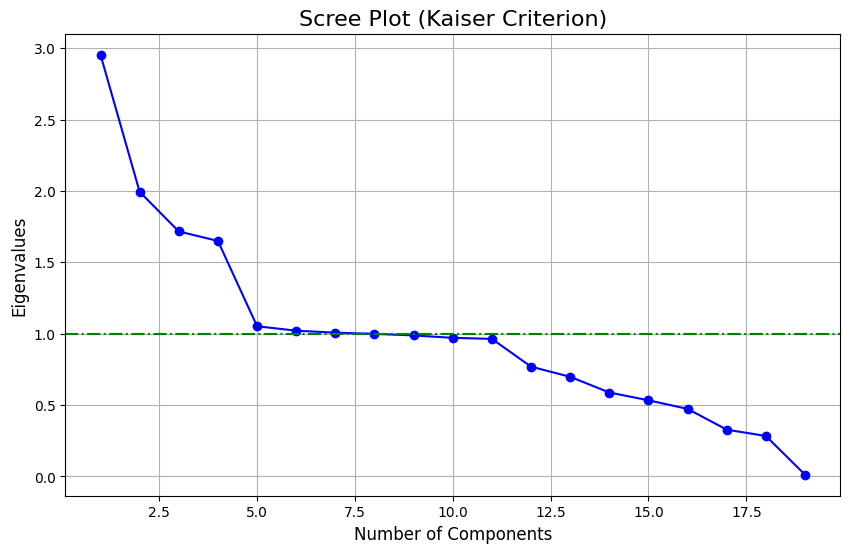

Eigenvalues:
Component 1: 2.955
Component 2: 1.994
Component 3: 1.717
Component 4: 1.650
Component 5: 1.052
Component 6: 1.021
Component 7: 1.007
Component 8: 0.999
Component 9: 0.988
Component 10: 0.971
Component 11: 0.964
Component 12: 0.769
Component 13: 0.698
Component 14: 0.588
Component 15: 0.533
Component 16: 0.473
Component 17: 0.327
Component 18: 0.283
Component 19: 0.012


In [10]:
# Kaiser Criterion
explained_variance = pca.explained_variance_

# Create numpy array so that index starts with 1
pcomp = np.arange(pca.n_components_) + 1

# Create Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(pcomp,
         explained_variance,
         'bo-')
plt.title('Scree Plot (Kaiser Criterion)', fontsize=16)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Eigenvalues', fontsize=12)
plt.axhline(y=1, color='g', linestyle='dashdot')
plt.grid()
plt.show()

# Print eigenvalues
print("Eigenvalues:")
for i, eigenvalue in enumerate(explained_variance, 1):
    print(f"Component {i}: {eigenvalue:.3f}")

## D3: Variance of Each Component

Section D2 identifies the most appropriate number of Principal Components as 7 based on Kaiser Criterion. The following code print out the variance explained by each component start at PC1 up through PC7.

In [11]:
# Print individual variance for first 7 components
print("Variance Explained by Each Component:")
cumulative = 0
for i in range(7):
    variance_explained = explained_variance[i] / sum(explained_variance) * 100
    print(f"PC{i+1}: {variance_explained:.2f}%")

Variance Explained by Each Component:
PC1: 15.55%
PC2: 10.50%
PC3: 9.03%
PC4: 8.68%
PC5: 5.54%
PC6: 5.37%
PC7: 5.30%


## D4: Total Variance Captured by Components

By analyzing the explained variance ratio, it is determined that the 7 Principal Components explains 59.98% of variance in the dataset.

In [12]:
total_variance_captured = np.sum(pca.explained_variance_ratio_[:7])
print(f"Total variance captured: {total_variance_captured*100:.2f}%")

Total variance captured: 59.98%


## D5: Summary of Data Analysis

PCA identified seven principal components that together explain 59.98% of the total variance in the dataset. Three of these components (PC1, PC2, and PC3) showed statistically significant differences between readmitted and non-readmitted patients. To compare the components to readmission status, the following steps were completed:

1. Create plots for each component to analyze PC value variance between readmission status groups
2. Calculate the mean PC value for each readmission status group to check the variance between means
3. Use t-tests and p-values to check to see if the variance between the means is statistically significant
4. For PCs with statistically significant variances, analyze the loading matrix to determine which key underlying factors contribute to the variation

To answer the question for this analysis, each of the three components with statistically significant differences between readmitted and non-readmitted patients are analyzed separetely:

**Principal Component 1 (PC1)**
- Explains 15.55% of total variance
- Key contributors (PC Value > 0.3):
    - Item1-Survey_Timely_Admission: 0.455
    - Item2-Survey_Timely_Treatment: 0.428
    - Item6-Hours_of_Treatment: 0.410
    - Item3-Survey_Timely_Visit: 0.395
    - Item7-Survey_Courteous_Staff: 0.356
    - Item8-Survey_Doctor_Active_Listening: 0.313
- Analysis: Timely care and patient experience with medical staff are important factors in readmission risk.

**Principal Component 2 (PC2)**
- Explains 10.50% of total variance
- Key contributors (PC Value > 0.3):
    - TotalCharge: 0.701
    - Initial_days: 0.699
- Analysis: Longer initial stays and higher costs are associated with readmission risk.

**Principal Component 3 (PC3)**
- Explains 9.03% of total variance
- Key contributors (PC Value > 0.3):
  - Additional charges (0.695)
  - Age (0.694)
- Analysis: Age combined with cost factors play a role in readmission risk.

After analyzing the three principal components separetely, there are clear themes that emerge and recommendations that can be made to the hospital staff. First and foremost, PCA has revealed that timely care is a very important factor in readmission risk. Staff would be wise to compare the patient survey responses against the actual time something occurred to get a baseline on what a patient considers a postive timely experience. That baseline can serve as a start to implement procedures and protocols that can provide a more timely experience and therefore reduce readmission risk. Positive experience with staff should always be a goal, but in this case, finding staff members correlated to negative member experience would ultimately lead to findings that could influence readmission risk. Total charge and initial days on the surface in PC2 do not give clear guidance on what can be done to prevent readmissions, but ultimately it can be prompt further research in to what is causing longer stays and increased charges to find ways to reduce both. Finally, age influences readmission risk, but is very difficult to take action on since someone's age is what it is. To influence age, further analysis would be warranted about the patient experience and overall health outcome.

To summarize, these findings suggest that a multi-faceted approach addressing patient experience, length of stay optimization, and age-specific care protocols could help reduce readmission risk. The strong correlation between financial factors and readmission also indicates that early intervention in potentially costly cases might help prevent readmissions.

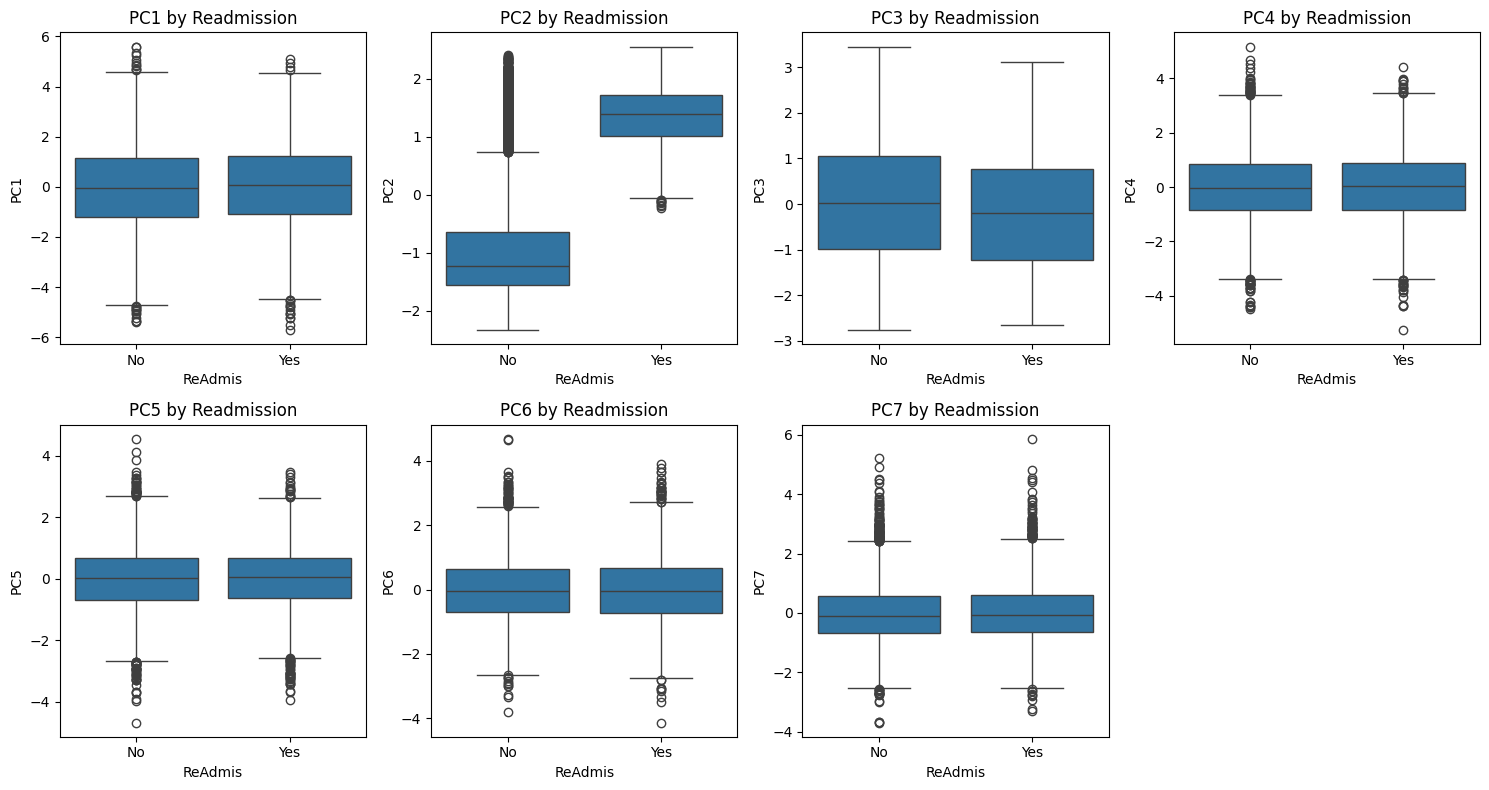

In [13]:
# Create DataFrame with PCA results and readmission status
pca_df = pd.DataFrame(PC, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df['ReAdmis'] = df['ReAdmis']

# Create box plots for first 7 PCs by readmission status
plt.figure(figsize=(15, 8))
components_to_plot = 7

# Create subplots for each component
for i in range(components_to_plot):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='ReAdmis', y=f'PC{i+1}', data=pca_df)
    plt.title(f'PC{i+1} by Readmission')
    
plt.tight_layout()
plt.show()

In [14]:
# Print out mean PC value by readmission status
pcs_to_analyze = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
mean_by_readmis = pca_df[pcs_to_analyze + ['ReAdmis']].groupby('ReAdmis').mean()
print("\nMean PC values by Readmission Status:")
print(mean_by_readmis.round(4))


Mean PC values by Readmission Status:
            PC1     PC2     PC3     PC4     PC5     PC6     PC7
ReAdmis                                                        
No      -0.0405 -0.7754  0.0936 -0.0122 -0.0076 -0.0001 -0.0138
Yes      0.0695  1.3387 -0.1617  0.0212  0.0133 -0.0000  0.0236


In [15]:
# Check to see if the variance between patients that were readmitted and those that were not is statistically significant
print("\nT-test results for each PC:")
for i in range(7):
    pc_col = f'PC{i+1}'
    t_stat, p_val = stats.ttest_ind(
    pca_df[pca_df['ReAdmis'] == 'Yes'][pc_col],
    pca_df[pca_df['ReAdmis'] == 'No'][pc_col]
    )
    print(f"{pc_col}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")


T-test results for each PC:
PC1: t-statistic = 3.0845, p-value = 0.0020
PC2: t-statistic = 104.1713, p-value = 0.0000
PC3: t-statistic = -9.4314, p-value = 0.0000
PC4: t-statistic = 1.2554, p-value = 0.2094
PC5: t-statistic = 0.9816, p-value = 0.3263
PC6: t-statistic = 0.0047, p-value = 0.9962
PC7: t-statistic = 1.7976, p-value = 0.0723


In [16]:
# Use the loading matrix to identify the variables with the strongest correlations for each PC
for pc in loading_matrix.index[:7]:
    # Get absolute values of loadings and sort
    loadings = abs(loading_matrix.loc[pc])
    top_features = loadings.nlargest(10)
    
    print(f"\n{pc} Top Contributors:")
    for feature, value in top_features.items():
        print(f"{feature}: {value:.3f}")


PC1 Top Contributors:
Item1-Survey_Timely_Admission: 0.455
Item2-Survey_Timely_Treatment: 0.428
Item6-Hours_of_Treatment: 0.410
Item3-Survey_Timely_Visit: 0.395
Item7-Survey_Courteous_Staff: 0.356
Item8-Survey_Doctor_Active_Listening: 0.313
Item5-Survey_Options: 0.190
Item4-Survey_Reliability: 0.152
Initial_days: 0.026
TotalCharge: 0.025

PC2 Top Contributors:
TotalCharge: 0.701
Initial_days: 0.699
Additional_charges: 0.087
Age: 0.087
Children: 0.034
Item7-Survey_Courteous_Staff: 0.027
Population: 0.025
vitD_supp: 0.025
Full_meals_eaten: 0.021
Income: 0.020

PC3 Top Contributors:
Additional_charges: 0.695
Age: 0.694
Initial_days: 0.091
Item5-Survey_Options: 0.082
TotalCharge: 0.081
Item4-Survey_Reliability: 0.069
Item3-Survey_Timely_Visit: 0.046
Item2-Survey_Timely_Treatment: 0.043
Item1-Survey_Timely_Admission: 0.042
Population: 0.031

PC4 Top Contributors:
Item5-Survey_Options: 0.578
Item4-Survey_Reliability: 0.553
Item1-Survey_Timely_Admission: 0.294
Item3-Survey_Timely_Visit: 0.29

# Part V: Attachments

## E: Sources for Third-Party Code

Kamara, K. (n.d.). PCA Educational Materials. Western Governors University. https://srm--c.vf.force.com/apex/CourseArticle?id=kA03x0000015vsECAQ

Sharma, A. (2024, October 1). Principal Component Analysis (PCA) in Python tutorial. DataCamp. https://www.datacamp.com/tutorial/principal-component-analysis-in-python 

## F: Sources

Kamara, K. (n.d.). PCA Educational Materials. Western Governors University. https://srm--c.vf.force.com/apex/CourseArticle?id=kA03x0000015vsECAQ

Keita, Z. (2023b, February 13). Principal Component Analysis (PCA) in R tutorial. DataCamp. https://www.datacamp.com/tutorial/pca-analysis-r 

Powell, V. (n.d.). Principal component analysis explained visually. Explained Visually. https://setosa.io/ev/principal-component-analysis/ 

Sharma, A. (2024, October 1). Principal Component Analysis (PCA) in Python tutorial. DataCamp. https://www.datacamp.com/tutorial/principal-component-analysis-in-python

What is Principal Component Analysis (PCA)?. IBM. (2023, December 8). https://www.ibm.com/think/topics/principal-component-analysis 